In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import nltk
%matplotlib inline

In [2]:
food = pd.read_csv('./ready_for_cvec.csv', dtype=object, index_col=0)

In [3]:
food = food.dropna().reset_index(drop=True)

In [4]:
food.shape

(23340, 21)

In [5]:
#prepping for cosine similarities 
food['without_hashes'] = food['without_hashes'] + ' '
grouped = food.groupby('name', as_index=False)['without_hashes'].sum()
comp_list = [x for x in grouped['without_hashes']]

In [6]:
#vectorizing to get cosine similarities across profiles by company
tfidf = TfidfVectorizer(min_df=1)
vect = tfidf.fit_transform(comp_list)
cosine_similarities = pd.DataFrame((vect * vect.T).A)
cosine_similarities.columns = list(grouped['name'].values)
cosine_similarities.index = list(grouped['name'].values)

[Text(0,0.5,'Chipotle'),
 Text(0,1.5,'Cracker_Barrel'),
 Text(0,2.5,'Dennys'),
 Text(0,3.5,'Dominos'),
 Text(0,4.5,'Dunkin_Donuts'),
 Text(0,5.5,'McDonalds'),
 Text(0,6.5,'Shake_Shack'),
 Text(0,7.5,'Sonic'),
 Text(0,8.5,'Starbucks'),
 Text(0,9.5,'Wendys'),
 Text(0,10.5,'Wingstop')]

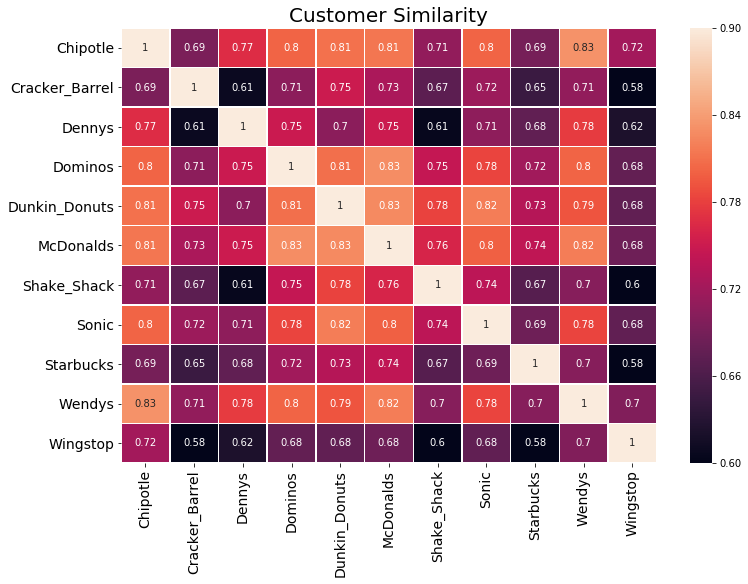

In [7]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(10, 220, sep=80, n=7)
ax = sns.heatmap(cosine_similarities, annot=True, linewidths=0.5, vmin=.6, vmax=.9)
plt.title('Customer Similarity', fontsize=20)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

In [54]:
cosine_similarities.mean()

Chipotle          0.785881
Cracker_Barrel    0.710559
Dennys            0.724520
Dominos           0.783817
Dunkin_Donuts     0.791352
McDonalds         0.795484
Shake_Shack       0.725357
Sonic             0.773721
Starbucks         0.712461
Wendys            0.783370
Wingstop          0.682518
dtype: float64

## Looking at hierarchical clustering

In [17]:
X = vect.toarray()
Z = linkage(X, 'ward')

In [19]:
#values closer to one are good- indicating the groups sit close to one another
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.8441988135454509

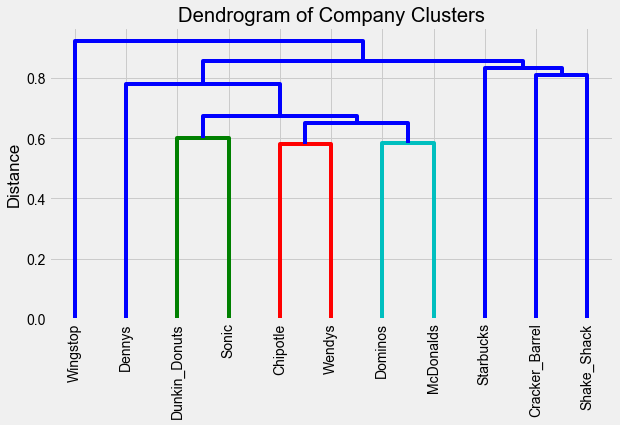

In [44]:
fig, ax = plt.subplots(figsize=(9,5))
plt.style.use('fivethirtyeight')
plt.title('Dendrogram of Company Clusters')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,leaf_font_size=14., labels= list(grouped['name'].values));

array(['Chipotle', 'Cracker_Barrel', 'Dennys', 'Dominos', 'Dunkin_Donuts',
       'McDonalds', 'Shake_Shack', 'Sonic', 'Starbucks', 'Wendys',
       'Wingstop'], dtype=object)